# Internet of Wands (WIP)

This notebook is part of [*Practical Data Science for IoT*](https://github.com/pablodecm/datalab_ml_iot) tutorial by Pablo de Castro

## Overview of Use Case

The aim of this example is to demonstrate an end-to-end
example of a machine learning for a (consumer) IoT application
and remark the main challenges associated.

**The use case chosen is a imaginary application where smartphones
devices act as magic wands and we want to make a spell recognition
system, which will be referred as Internet of Wands (IoW).**

We will be focussing on how could we can collect and process 
for training and evaluating a model for such an application. We will also
discuss how we could deploy to production.


### Important Remark

Most of the discussion and technology choices to follow are
not unique of this application and could be readily applied
to use cases  such as:
- Human Activity Recognition with Wearables (e.g. running, lying down, driving or sitting)
- Elderly fall/accident/emergency alert system
- Possible Consumer Applications, for example:
    - Gym Repetition Counter: identify exercise and count the reps based on wearables
    - Parkinson Disease Early Detection system
- Also broadly related with distributed training applications such a self-driving cars (e.g. Tesla Object recognition model [[1]](#References))


## Important Aspects

We will be discussing many aspects of the data cycle in supervised ML workflows for IoT, such as:

- *Training Data Collection*:
    - What device/hardware/configuration are we gonna use for a given application?
    - Which sensors and additional data are relevant?
    - Who/how is gonna be labelling/labelled the data? Do they need training to standarise the process?
    - How much data we need for the application?
    - Can we oversee and control the data collection process?
    - How can we make data labelling it as easy as possible?
    - Can we replicate the training conditions in production?
    - **How expensive is it gonna be?**

- *Training Data Transport and Processing*:
    - Where and how are we gonna store the data?
    - How are we gonna transfer data from the devices to our data processing center?
    - How much preprocessing we are gonna do on the device (i.e. edge computing)?
    - How can we ensure security and privacy (e.g. transport encryption)?
    - Have we test the data collection framework properly before data collection starts?
    - **What volume of data is expected to flow to the servers per unit of time? Will the infrastructure scale and be robust enough?**

- *Data analysis and model building*:
    - What do we want to do?
    - Which tools/platforms/servers are we gonna use to explore the data?
    - What type of data are we studying (e.g. time-series sensor, audio, images, text, etc)?
    - What is the dimensionality and structure of the data?
    - What are the possible factors that affect to the variance of
      the data (e.g. data collection issues or changes in the
      environment)?
    - How easy will it be?
    - Which techniques are more appropiate for a given type and volume of data?
    - Can we complement with existing datasets or starting from a pre-trained model?
    - How are we gonna to evaluate the performance to have unbiased measures?
    - **What is the right trade-off between model complexity and
    performance for the given application?**



- *Production Environment*:
    - How are we gonna be using the resulting model in production?
    - Can we deploy it first as a beta or internally to verify that it works as expected?
    - Where are we gonna to carry out the model evaluation (e.g. our own remote servers, cloud or device)?
    - Can we setup a loop monitoring and redeployment the model in production?
    - **How much is expected to be gained by training with more data or improving the model?**

## Data Collection Infrastructure

Here is an scheme of how the IOW data collection infrastructure,
that uses common IoT technologies (e.g. a MQTT broker and node-red):

<div align="center">
  <img src="https://raw.githubusercontent.com/pablodecm/datalab_ml_iot/master/04_internet_of_wands/images/iow_infrastructure.png" height="50%" style="max-width: 80%">
</div>

## Data Collection Campaign

Go with your smartphone to https://iow.pablodecm.com/ and generate magic spell demostrations.



## Downloading And Loading Latest Dataset

You download the latest dataset from the GitHub repository.

In [3]:
!wget "https://github.com/pablodecm/datalab_ml_iot/raw/master/04_internet_of_wands/iow_data.zip"; unzip -o iow_data.zip

--2020-03-30 17:07:57--  https://github.com/pablodecm/datalab_ml_iot/raw/master/04_internet_of_wands/iow_data.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/pablodecm/datalab_ml_iot/master/04_internet_of_wands/iow_data.zip [following]
--2020-03-30 17:07:57--  https://media.githubusercontent.com/media/pablodecm/datalab_ml_iot/master/04_internet_of_wands/iow_data.zip
Resolving media.githubusercontent.com (media.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3028517 (2.9M) [application/zip]
Saving to: ‘iow_data.zip’

iow_data.zip        100%[===================>]   2.89M  18.9MB/s    in 0.2s    

2020-03-30 17:07:58 (18.9 MB/

### Loading the Data

We have do decide how we want to represent the data and also
work on a custom reader for our set of json-based files.

In [4]:
cat iow_data/alohomora/Cedric_2579103d.01bba.json

{"accel_data":{"timestamp":[240693600.30000004,240693616.30000004,240693632.30000004,240693648.3,240693664.3,240693680.3,240693696.4,240693712.3,240693728.3,240693744.3,240693760.3,240693776.3,240693792.30000004,240693808.30000004,240693824.30000004,240693840.30000004,240693856.30000004,240693872.30000004,240693888.30000004,240693904.30000004,240693920.30000004,240693952.3,240693968.3,240693984.3,240694000.3,240694016.40000004,240694032.3,240694048.3,240694064.30000004,240694080.40000004,240694096.30000004,240694112.40000004,240694128.30000004,240694144.30000004,240694160.30000004,240694176.30000004,240694192.30000004,240694208.4,240694224.4,240694240.3,240694256.3,240694272.3,240694288.3,240694304.50000003,240694320.3,240694352.40000004,240694368.40000004,240694384.30000004,240694400.30000004,240694416.30000004,240694432.30000004,240694448.30000004,240694464.30000004,240694480.30000004,240694496.4,240694512.3,240694528.3,240694544.3,240694560.4,240694576.3,240694592.3,240694608.3,2406

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

example_file = "iow_data/wingardium-leviosa/Peppapig_9b2bd7a9.0696f8.json"

example_df = pd.read_json(example_file)
print(example_df.dtypes)
example_df

accel_data         object
gyro_data          object
wizard_name        object
device_select      object
spell_select       object
start_timestamp     int64
dtype: object


,accel_data,gyro_data,wizard_name,device_select,spell_select,start_timestamp
timestamp,"[10390749.2, 10390769.200000003, 10390789.4000...","[10390745.300000003, 10390765.299999999, 10390...",Peppapig,android,wingardium-leviosa,1557337941821
x,"[1.86602783203125, 1.875595092773437, 2.095870...","[0.180252075195312, 0.4124755859375, 0.5850524...",Peppapig,android,wingardium-leviosa,1557337941821
y,"[5.3706207275390625, 5.210205078125, 5.3706207...","[0.36643981933593706, 0.8905487060546871, 1.21...",Peppapig,android,wingardium-leviosa,1557337941821
z,"[12.828231811523438, 11.37255859375, 9.4835357...","[-0.326934814453125, -0.152236938476562, -0.10...",Peppapig,android,wingardium-leviosa,1557337941821


In [6]:
# we can apply a series transformation and then invert to get it in a much better format
accel_df = example_df.accel_data.apply(pd.Series).T
accel_df["timestamp"] = pd.to_timedelta(accel_df.timestamp, unit="ms")
accel_df

,timestamp,x,y,z
0,02:53:10.749200,1.866028,5.370621,12.828232
1,02:53:10.769200,1.875595,5.210205,11.372559
2,02:53:10.789400,2.095871,5.370621,9.483536
3,02:53:10.799300,1.978546,5.401749,8.662323
4,02:53:10.819500,1.528442,5.392166,7.817169
...,...,...,...,...
91,02:53:12.263700,-0.935196,-0.260544,0.007294
92,02:53:12.283800,0.388794,1.290894,-7.857666
93,02:53:12.303900,-0.231293,2.636444,0.002502
94,02:53:12.313900,-0.877731,2.787277,6.033493


In [7]:
# timestamps of giro and accel sensors are high precision with a common origin
gyro_df = example_df.gyro_data.apply(pd.Series).T
gyro_df["timestamp"] = pd.to_timedelta(gyro_df.timestamp, unit="ms")
gyro_df


,timestamp,x,y,z
0,02:53:10.745300,0.180252,0.366440,-0.326935
1,02:53:10.765300,0.412476,0.890549,-0.152237
2,02:53:10.785400,0.585052,1.213318,-0.103226
3,02:53:10.795300,0.625534,1.308136,-0.120270
4,02:53:10.815400,0.596771,1.216522,-0.104294
...,...,...,...,...
91,02:53:12.259800,6.291672,1.269791,-0.893661
92,02:53:12.279800,2.696411,0.658325,-0.413223
93,02:53:12.299900,-0.831757,1.474319,-0.155426
94,02:53:12.309900,-1.663727,1.011993,-0.011612


In [8]:
# we can use the minimum of timestamp as origin to have the same reference
min_timestamp = min([accel_df.timestamp.min(),gyro_df.timestamp.min()])

accel_df["timestamp"] -= min_timestamp
gyro_df["timestamp"] -= min_timestamp
# set first element to 0 to have the same start
accel_df.loc[0,"timestamp"] = pd.Timedelta(0)
gyro_df.loc[0,"timestamp"] = pd.Timedelta(0)
accel_df = accel_df.set_index("timestamp")
gyro_df = gyro_df.set_index("timestamp")

accel_df.head()

,x,y,z
timestamp,,,
00:00:00,1.866028,5.370621,12.828232
00:00:00.023900,1.875595,5.210205,11.372559
00:00:00.044100,2.095871,5.370621,9.483536
00:00:00.054000,1.978546,5.401749,8.662323
00:00:00.074200,1.528442,5.392166,7.817169


In [9]:
# still the sampling is slightly different
gyro_df.head()

,x,y,z
timestamp,,,
00:00:00,0.180252,0.366440,-0.326935
00:00:00.020000,0.412476,0.890549,-0.152237
00:00:00.040100,0.585052,1.213318,-0.103226
00:00:00.050000,0.625534,1.308136,-0.120270
00:00:00.070100,0.596771,1.216522,-0.104294


In [10]:
# we can resample to fix that
resampled_accel_df = accel_df.resample("20ms").mean().interpolate('time')
resampled_gyro_df = gyro_df.resample("20ms").mean().interpolate('time')

resampled_accel_df

,x,y,z
timestamp,,,
00:00:00,1.866028,5.370621,12.828232
00:00:00.020000,1.875595,5.210205,11.372559
00:00:00.040000,2.037209,5.386185,9.072929
00:00:00.060000,1.528442,5.392166,7.817169
00:00:00.080000,1.468582,5.373016,8.075745
...,...,...,...
00:00:01.500000,-0.139122,-0.507149,5.864708
00:00:01.520000,0.388794,1.290894,-7.857666
00:00:01.540000,-0.231293,2.636444,0.002502


In [11]:
# we can then finally merge
merged_df = pd.merge(resampled_accel_df, resampled_gyro_df, 
                     left_index=True, right_index=True,
                     suffixes=["_accel","_gyro"], how="inner")

merged_df

,x_accel,y_accel,z_accel,x_gyro,y_gyro,z_gyro
timestamp,,,,,,
00:00:00,1.866028,5.370621,12.828232,0.180252,0.366440,-0.326935
00:00:00.020000,1.875595,5.210205,11.372559,0.412476,0.890549,-0.152237
00:00:00.040000,2.037209,5.386185,9.072929,0.605293,1.260727,-0.111748
00:00:00.060000,1.528442,5.392166,7.817169,0.596771,1.216522,-0.104294
00:00:00.080000,1.468582,5.373016,8.075745,0.598907,1.049271,-0.073410
...,...,...,...,...,...,...
00:00:01.500000,-0.139122,-0.507149,5.864708,6.392342,2.134247,-0.957047
00:00:01.520000,0.388794,1.290894,-7.857666,2.696411,0.658325,-0.413223
00:00:01.540000,-0.231293,2.636444,0.002502,-0.831757,1.474319,-0.155426


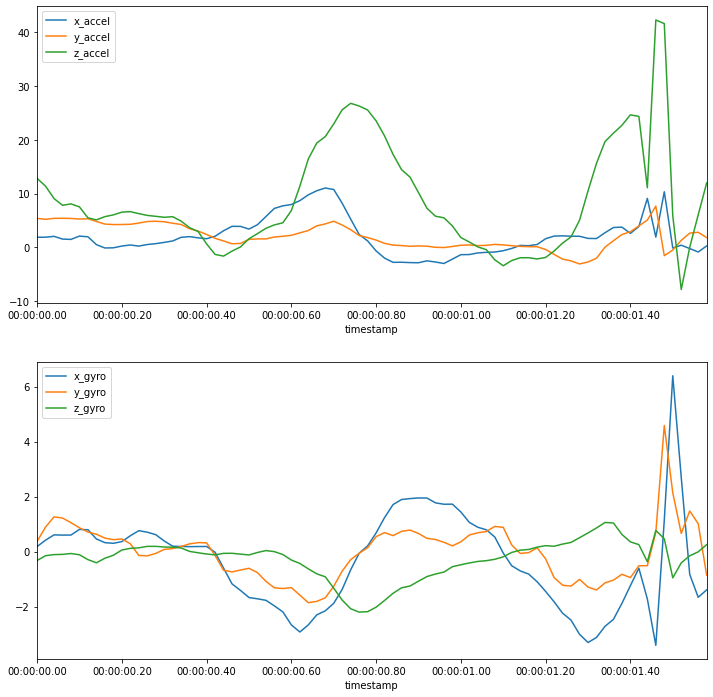

In [12]:
fig, axs = plt.subplots(2, figsize=(12,12))

merged_df.filter(regex="._accel").plot(ax=axs[0])
merged_df.filter(regex="._gyro").plot(ax=axs[1])

In [0]:
# we can define a function to do all the pre-processing for a given json file

from pathlib import Path

def load_df_from_iow_json(json_path: Path) -> pd.DataFrame:
    
    # load json file to dataframe
    raw_df = pd.read_json(json_path)
    
    # convert to series to avoid having object elements
    accel_df = raw_df.accel_data.apply(pd.Series).T
    accel_df["timestamp"] = pd.to_timedelta(accel_df.timestamp, unit="ms")
    gyro_df = raw_df.gyro_data.apply(pd.Series).T
    gyro_df["timestamp"] = pd.to_timedelta(gyro_df.timestamp, unit="ms")
    
    # we can use the minimum of timestamp as origin to have the same reference
    min_timestamp = min([accel_df.timestamp.min(),gyro_df.timestamp.min()])

    # set the same timestamp origin
    accel_df["timestamp"] -= min_timestamp
    gyro_df["timestamp"] -= min_timestamp
    # set first element to 0 to have the same start
    accel_df.loc[0,"timestamp"] = pd.Timedelta(0)
    gyro_df.loc[0,"timestamp"] = pd.Timedelta(0)
    accel_df = accel_df.set_index("timestamp")
    gyro_df = gyro_df.set_index("timestamp")
    
    # resample and interpolate to make homogeneous
    resampled_accel_df = accel_df.resample("20ms").mean().interpolate('time')
    resampled_gyro_df = gyro_df.resample("20ms").mean().interpolate('time')
    
    # merge in a single df
    merged_df = pd.merge(resampled_accel_df, resampled_gyro_df, 
                         left_index=True, right_index=True,
                         suffixes=["_accel","_gyro"], how="inner")
    
    del raw_df["accel_data"]
    del raw_df["gyro_data"]
    
    return merged_df, raw_df.loc["timestamp"].copy()


In [14]:
# check if it works from example
load_df_from_iow_json(example_file)[0]

,x_accel,y_accel,z_accel,x_gyro,y_gyro,z_gyro
timestamp,,,,,,
00:00:00,1.866028,5.370621,12.828232,0.180252,0.366440,-0.326935
00:00:00.020000,1.875595,5.210205,11.372559,0.412476,0.890549,-0.152237
00:00:00.040000,2.037209,5.386185,9.072929,0.605293,1.260727,-0.111748
00:00:00.060000,1.528442,5.392166,7.817169,0.596771,1.216522,-0.104294
00:00:00.080000,1.468582,5.373016,8.075745,0.598907,1.049271,-0.073410
...,...,...,...,...,...,...
00:00:01.500000,-0.139122,-0.507149,5.864708,6.392342,2.134247,-0.957047
00:00:01.520000,0.388794,1.290894,-7.857666,2.696411,0.658325,-0.413223
00:00:01.540000,-0.231293,2.636444,0.002502,-0.831757,1.474319,-0.155426


In [0]:
md_fields = ["spell_select","device_select","wizard_name"]
data_path = Path("./iow_data")

merged_df_dict = {}
for path in data_path.glob("*/*"):
    rel_path = path.relative_to(data_path)
    merged_df, metadata = load_df_from_iow_json(path)
    
    spell_id = (rel_path.parent/rel_path.stem).as_posix()
    key = tuple(metadata.loc[md_fields].to_list() + [spell_id])
    merged_df_dict[key] = merged_df


In [16]:
all_df = pd.concat(merged_df_dict, names = (md_fields+ ["spell_id"]))
all_df

x_accel  ...    z_gyro
spell_select device_select wizard_name spell_id                         timestamp                  ...          
lumos        android       pablodecm   lumos/pablodecm_2814694c.a96f86  00:00:00        -1.921661  ... -0.280579
                                                                        00:00:00.020000 -1.323456  ... -0.071671
                                                                        00:00:00.040000 -1.333023  ... -0.064331
                                                                        00:00:00.060000 -2.304520  ...  0.144562
                                                                        00:00:00.080000 -0.043289  ...  0.575218
...                                                                                           ...  ...       ...
reparo       android       pablodecm   reparo/pablodecm_8448c547.923f08 00:00:00.760000  9.067616  ... -1.765663
                                                                        00:00:00.780000  8.227545  ... -2.515429
                                                                        00:00:00.800000  5.827795  ... -3.052467
                                                                        00:00:00.820000  3.825621  ... -3.160445
                                                                        00:00:00.840000  1.803974  ... -2.966022

[38154 rows x 6 columns]

In [0]:
test_subset = ['pablodecm']
test_df = all_df.loc[(slice(None),slice(None),list(test_subset),slice(None)),:]
all_others = set(all_df.index.get_level_values(2).unique()) - set(test_subset)
train_df = all_df.loc[(slice(None),slice(None),list(all_others),slice(None)),:]

In [18]:
train_df

x_accel  ...    z_gyro
spell_select device_select wizard_name  spell_id                           timestamp                  ...          
lumos        android       Harry        lumos/Harry_cf3d9620.4cd138        00:00:00         6.847000  ...       NaN
                           Nicolo       lumos/Nicolo_39593a67.8bced6       00:00:00        -0.155623  ...  0.026878
                                                                           00:00:00.020000 -0.155623  ...  0.026398
                                                                           00:00:00.040000 -0.155623  ...  0.025918
                                                                           00:00:00.060000 -0.086191  ...  0.025438
...                                                                                              ...  ...       ...
reparo       android       Gana el ajax reparo/Gana el ajax_e8296d47.1f88c 00:00:00.760000 -5.839458  ...  1.305505
                                                                           00:00:00.780000  0.442927  ...  1.255719
                                                                           00:00:00.800000  3.071162  ...  0.691585
                                                                           00:00:00.820000  3.561375  ...  0.178458
                                                                           00:00:00.840000  3.327940  ... -0.082992

[30674 rows x 6 columns]

In [28]:
variable_names = ["x_accel", "y_accel", "z_accel", "x_gyro", "y_gyro", "z_gyro"]
features = []

for name, sample_df in train_df.iloc[:100].groupby("spell_id"):
  variable_arr = sample_df.loc[:,variable_names].values


  print(variable_arr.shape)

(1, 6)
(99, 6)


About high-resolution time in web applications:

https://www.w3.org/TR/hr-time-2/#dfn-time-origin

## References

For an overview of a state-of-the-art distributed training
infrastructure including redeployment and the importance
of edge in real-time applications you can check the Tesla Autonomy day presentation:

- [1] [*Tesla Autonomy Day*](https://www.youtube.com/watch?v=Ucp0TTmvqOE)  Youtube video (+2hrs)

There are several publications using combinations of RNNs and CNNs
for dealing with IoT sensor data, for task such as
Human Activity Recognition:
- [2] Yao, Shuochao, et al. [*Deepsense: A unified deep learning framework for time-series mobile sensing data processing*](https://arxiv.org/abs/1611.01942) Proceedings of the 26th International Conference on World Wide Web. International World Wide Web Conferences Steering Committee, 2017.